In [2]:
import pandas as pd
import numpy as np
import semopy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from semopy import Model
from semopy import calc_stats

In [3]:
data = pd.read_excel(r'C:\Users\HP\Downloads\Processed_Data.xlsx', sheet_name='Final Data')
data

,date,temperature,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,snowfall_sum,confirmed,deaths,recovered,...,internal_movement_restrictions,international_movement_restrictions,facial_coverings,elderly_people_protection,retail_and_recreation_percent_change,grocery_and_pharmacy_percent_change,parks_percent_change,transit_stations_percent_change,workplaces_percent_change,residential_percent_change
0,2020-02-16,13,10,5,0.6,0.6,0.0,1,0,1,...,0,1,0,1,16,19,32,11,0,-1
1,2020-02-17,9,10,1,4.2,4.2,0.0,1,0,1,...,0,1,0,1,0,-1,1,-10,-15,2
2,2020-02-18,7,10,8,0.1,0.1,0.0,1,0,1,...,0,1,0,1,2,-1,8,-10,-14,3
3,2020-02-19,6,10,9,2.1,2.1,0.0,1,0,1,...,0,1,0,1,4,0,7,-7,-15,2
4,2020-02-20,8,10,3,1.8,1.8,0.0,1,0,1,...,0,1,0,1,1,-7,21,-4,-19,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,2022-10-11,12,11,10,0.0,0.0,0.0,8883,16,8867,...,1,1,2,3,-1,24,120,-5,-12,5
969,2022-10-12,11,11,9,0.0,0.0,0.0,8178,15,8163,...,1,1,2,3,1,21,117,-5,-11,4
970,2022-10-13,11,11,2,1.5,1.5,0.0,6585,22,6563,...,1,1,2,3,-3,24,80,-7,-12,5
971,2022-10-14,13,11,2,6.3,6.3,0.0,5152,10,5142,...,1,1,2,3,-5,21,72,-3,-12,5


In [4]:
data.drop(columns=["date","confirmed"],inplace=True)
data

,temperature,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,snowfall_sum,deaths,recovered,infected,school_closing,...,internal_movement_restrictions,international_movement_restrictions,facial_coverings,elderly_people_protection,retail_and_recreation_percent_change,grocery_and_pharmacy_percent_change,parks_percent_change,transit_stations_percent_change,workplaces_percent_change,residential_percent_change
0,13,10,5,0.6,0.6,0.0,0,1,1,2,...,0,1,0,1,16,19,32,11,0,-1
1,9,10,1,4.2,4.2,0.0,0,1,0,2,...,0,1,0,1,0,-1,1,-10,-15,2
2,7,10,8,0.1,0.1,0.0,0,1,0,2,...,0,1,0,1,2,-1,8,-10,-14,3
3,6,10,9,2.1,2.1,0.0,0,1,1,2,...,0,1,0,1,4,0,7,-7,-15,2
4,8,10,3,1.8,1.8,0.0,0,1,4,2,...,0,1,0,1,1,-7,21,-4,-19,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,12,11,10,0.0,0.0,0.0,16,8867,4959,0,...,1,1,2,3,-1,24,120,-5,-12,5
969,11,11,9,0.0,0.0,0.0,15,8163,4959,0,...,1,1,2,3,1,21,117,-5,-11,4
970,11,11,2,1.5,1.5,0.0,22,6563,4959,0,...,1,1,2,3,-3,24,80,-7,-12,5
971,13,11,2,6.3,6.3,0.0,10,5142,4959,0,...,1,1,2,3,-5,21,72,-3,-12,5


In [5]:
data.columns

Index(['temperature', 'daylight_duration', 'sunshine_duration',
       'precipitation_sum', 'rain_sum', 'snowfall_sum', 'deaths', 'recovered',
       'infected', 'school_closing', 'workplace_closing',
       'gatherings_restrictions', 'transport_closing',
       'stay_home_restrictions', 'internal_movement_restrictions',
       'international_movement_restrictions', 'facial_coverings',
       'elderly_people_protection', 'retail_and_recreation_percent_change',
       'grocery_and_pharmacy_percent_change', 'parks_percent_change',
       'transit_stations_percent_change', 'workplaces_percent_change',
       'residential_percent_change'],
      dtype='object')

In [6]:


# Select numeric columns only
numeric_columns = ['temperature', 'daylight_duration', 'sunshine_duration',
       'precipitation_sum', 'rain_sum', 'snowfall_sum', 'deaths', 'recovered','infected', 
       'retail_and_recreation_percent_change',
       'grocery_and_pharmacy_percent_change', 'parks_percent_change',
       'transit_stations_percent_change', 'workplaces_percent_change',
       'residential_percent_change']


# Initialize scalers
z_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

# Scaling with z-scores (standardization)
z_scaled_data = data.copy()
z_scaled_data[numeric_columns] = z_scaler.fit_transform(z_scaled_data[numeric_columns])

min_max_scaled_data = data.copy()
min_max_scaled_data[numeric_columns] = min_max_scaler.fit_transform(min_max_scaled_data[numeric_columns])



# Save the scaled data if needed
z_scaled_data

,temperature,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,snowfall_sum,deaths,recovered,infected,school_closing,...,internal_movement_restrictions,international_movement_restrictions,facial_coverings,elderly_people_protection,retail_and_recreation_percent_change,grocery_and_pharmacy_percent_change,parks_percent_change,transit_stations_percent_change,workplaces_percent_change,residential_percent_change
0,0.035057,-0.968741,-0.658693,-0.354208,-0.329915,-0.152244,-0.644611,-0.577273,-0.598591,2,...,0,1,0,1,1.255409,0.417113,-0.807200,1.208215,1.079748,-1.439162
1,-0.517342,-0.968741,-1.497029,0.659037,0.707079,-0.152244,-0.644611,-0.577273,-0.598942,2,...,0,1,0,1,0.544168,-0.443379,-1.287361,0.333053,0.166717,-0.830775
2,-0.793542,-0.968741,-0.029941,-0.494936,-0.473942,-0.152244,-0.644611,-0.577273,-0.598942,2,...,0,1,0,1,0.633073,-0.443379,-1.178938,0.333053,0.227585,-0.627979
3,-0.931642,-0.968741,0.179644,0.067978,0.102166,-0.152244,-0.644611,-0.577273,-0.598591,2,...,0,1,0,1,0.721978,-0.400354,-1.194427,0.458076,0.166717,-0.830775
4,-0.655442,-0.968741,-1.077861,-0.016459,0.015750,-0.152244,-0.644611,-0.577273,-0.597538,2,...,0,1,0,1,0.588620,-0.701527,-0.977580,0.583099,-0.076758,-0.830775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,-0.103043,-0.601262,0.389228,-0.523082,-0.502747,-0.152244,0.915362,2.558500,1.142042,0,...,1,1,2,3,0.499715,0.632236,0.555840,0.541425,0.349323,-0.222388
969,-0.241143,-0.601262,0.179644,-0.523082,-0.502747,-0.152244,0.817864,2.309506,1.142042,0,...,1,1,2,3,0.588620,0.503163,0.509373,0.541425,0.410192,-0.425183
970,-0.241143,-0.601262,-1.287445,-0.100896,-0.070666,-0.152244,1.500353,1.743609,1.142042,0,...,1,1,2,3,0.410810,0.632236,-0.063723,0.458076,0.349323,-0.222388
971,0.035057,-0.601262,-1.287445,1.250097,1.311991,-0.152244,0.330372,1.241023,1.142042,0,...,1,1,2,3,0.321905,0.503163,-0.187636,0.624773,0.349323,-0.222388


In [8]:
desc="""
# measurement model

better_outdoor_environment =~ temperature + daylight_duration + sunshine_duration + precipitation_sum + rain_sum + snowfall_sum

encouraging_outdoor_activities =~ better_outdoor_environment + school_closing + workplace_closing + gatherings_restrictions + transport_closing + stay_home_restrictions + internal_movement_restrictions + international_movement_restrictions + facial_coverings + elderly_people_protection

panic =~ infected + deaths

awareness =~ infected + deaths + school_closing + workplace_closing + gatherings_restrictions + transport_closing + stay_home_restrictions + internal_movement_restrictions + international_movement_restrictions + facial_coverings + elderly_people_protection

# regressions

infected ~ temperature + daylight_duration + sunshine_duration + precipitation_sum + rain_sum + snowfall_sum + better_outdoor_environment + encouraging_outdoor_activities + parks_percent_change + residential_percent_change + workplaces_percent_change + transit_stations_percent_change
deaths ~ temperature + daylight_duration + sunshine_duration + precipitation_sum + rain_sum + snowfall_sum + better_outdoor_environment + encouraging_outdoor_activities + infected + parks_percent_change + residential_percent_change + workplaces_percent_change + transit_stations_percent_change

school_closing ~ infected + deaths + panic + parks_percent_change + residential_percent_change + workplaces_percent_change + transit_stations_percent_change
workplace_closing ~ infected + deaths + panic + parks_percent_change + residential_percent_change + workplaces_percent_change + transit_stations_percent_change
gatherings_restrictions ~ infected + deaths + panic + parks_percent_change + residential_percent_change + workplaces_percent_change + transit_stations_percent_change
transport_closing ~ infected + deaths + panic + parks_percent_change + residential_percent_change + workplaces_percent_change + transit_stations_percent_change
stay_home_restrictions ~ infected + deaths + panic + parks_percent_change + residential_percent_change + workplaces_percent_change + transit_stations_percent_change
internal_movement_restrictions ~ infected + deaths + panic + parks_percent_change + residential_percent_change + workplaces_percent_change + transit_stations_percent_change
international_movement_restrictions ~ infected + deaths + panic + parks_percent_change + residential_percent_change + workplaces_percent_change + transit_stations_percent_change
facial_coverings ~ infected + deaths + panic + parks_percent_change + residential_percent_change + workplaces_percent_change + transit_stations_percent_change
elderly_people_protection ~ infected + deaths + panic + parks_percent_change + residential_percent_change + workplaces_percent_change + transit_stations_percent_change

retail_and_recreation_percent_change ~ infected + deaths + school_closing + workplace_closing + gatherings_restrictions + transport_closing + stay_home_restrictions + internal_movement_restrictions + international_movement_restrictions + facial_coverings + elderly_people_protection + panic + awareness + encouraging_outdoor_activities
grocery_and_pharmacy_percent_change ~ infected + deaths + school_closing + workplace_closing + gatherings_restrictions + transport_closing + stay_home_restrictions + internal_movement_restrictions + international_movement_restrictions + facial_coverings + elderly_people_protection + panic + awareness + encouraging_outdoor_activities
parks_percent_change ~ infected + deaths + school_closing + workplace_closing + gatherings_restrictions + transport_closing + stay_home_restrictions + internal_movement_restrictions + international_movement_restrictions + facial_coverings + elderly_people_protection + panic + awareness + encouraging_outdoor_activities
transit_stations_percent_change ~ infected + deaths + school_closing + workplace_closing + gatherings_restrictions + transport_closing + stay_home_restrictions + internal_movement_restrictions + international_movement_restrictions + facial_coverings + elderly_people_protection + panic + awareness + encouraging_outdoor_activities
workplaces_percent_change ~ infected + deaths + school_closing + workplace_closing + gatherings_restrictions + transport_closing + stay_home_restrictions + internal_movement_restrictions + international_movement_restrictions + facial_coverings + elderly_people_protection + panic + awareness + encouraging_outdoor_activities
residential_percent_change ~ infected + deaths + school_closing + workplace_closing + gatherings_restrictions + transport_closing + stay_home_restrictions + internal_movement_restrictions + international_movement_restrictions + facial_coverings + elderly_people_protection + panic + awareness + encouraging_outdoor_activities


# residual correlations
infected, deaths ~~ school_closing + workplace_closing + gatherings_restrictions + transport_closing + stay_home_restrictions + internal_movement_restrictions + international_movement_restrictions + facial_coverings + elderly_people_protection
"""

In [9]:
solvers = ['SLSQP', 'L-BFGS-B', 'Trust-Constr', 'Powell', 'Nelder-Mead']
results = pd.DataFrame()

for solv in solvers:
    mod = Model(desc)
    mod.fit(z_scaled_data, solver=solv,options={'maxiter': 100})
    stats = calc_stats(mod)
    stats.insert(loc=0, column='Solver', value=solv)
    results=pd.concat([results, stats], ignore_index=True)



C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\scipy\optimize\_differentiable_functions.py:317: RuntimeWarning: invalid value encountered in subtract
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\semopy\solver.py:134: RuntimeWarning: Method Powell does not use gradient information (jac).
  res = minimize(self.fun, self.start, jac=self.grad, bounds=self.bounds,
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\scipy\optimize\_optimize.py:2502: RuntimeWarning: invalid value encountered in scalar multiply
  tmp2 = (x - v) * (fx - fw)
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\scipy\optimize\_optimize.py:2503: RuntimeWarning: invalid value encountered in scalar subtract
  p = (x - v) * tmp2 - (x - w) * tmp1
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\scipy\optimize\_optimize.py:2319: RuntimeWarning: invalid value encountered in scalar multiply
  q = (xf - fulc) * (fx

In [10]:
results

,Solver,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,SLSQP,31,253,13509.472814,0.0,31971.030907,0.575053,0.577446,-2.448582,0.577446,-2.468113,0.668816,462.231299,1657.925400,13.884350
1,L-BFGS-B,31,253,24562.414042,0.0,31971.030907,0.226578,0.231729,-5.270082,0.231729,-5.312119,0.902292,439.511996,1635.206096,25.244002
2,Trust-Constr,31,253,21120.349068,0.0,31971.030907,0.335099,0.339391,-4.391421,0.339391,-4.426450,0.836600,446.587155,1642.281255,21.706422
3,Powell,31,253,37748.543801,0.0,31971.030907,-0.189151,-0.180711,-8.636124,-0.180711,-8.705011,1.118814,412.407926,1608.102027,38.796037
4,Nelder-Mead,31,253,38328.522288,0.0,31971.030907,-0.207437,-0.198852,-8.784176,-0.198852,-8.854243,1.127383,411.215782,1606.909882,39.392109


In [11]:
mod = Model(desc)
mod.fit(z_scaled_data, solver='SLSQP',options={'maxiter': 1000})
stats = calc_stats(mod)
corr=mod.inspect()
mod.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,temperature,~,better_outdoor_environment,1.000000,-,-,-
1,daylight_duration,~,better_outdoor_environment,1.130360,0.036735,30.770483,0.0
2,sunshine_duration,~,better_outdoor_environment,0.897776,0.034316,26.162051,0.0
3,precipitation_sum,~,better_outdoor_environment,-0.139198,0.040383,-3.446964,0.000567
4,rain_sum,~,better_outdoor_environment,-0.088035,0.040489,-2.174308,0.029682
...,...,...,...,...,...,...,...
244,transport_closing,~~,transport_closing,0.216654,0.027421,7.90106,0.0
245,workplace_closing,~~,workplace_closing,3.449816,12.232383,0.282023,0.777926
246,workplaces_percent_change,~~,workplaces_percent_change,0.857173,1.002932,0.854667,0.392735
247,grocery_and_pharmacy_percent_change,~~,grocery_and_pharmacy_percent_change,0.197834,0.148652,1.330855,0.183237


In [13]:
corr=pd.read_csv(r'C:\Users\HP\Downloads\Adjusted\zscale_SLSQP.csv')

In [14]:
corr.replace("-", np.nan, inplace=True)

corr['p-value']=corr['p-value'].astype("float")
corr['z-value']=corr['z-value'].astype("float")
corr['Estimate']=corr['Estimate'].astype("float")
corr['Std. Err']=corr['Std. Err'].astype("float")

In [15]:
corr_matrix=corr[(corr["p-value"] < 0.05) & ((corr["z-value"] < -1.96) | (corr["z-value"] > 1.96)) & (corr["op"] == "~") ]



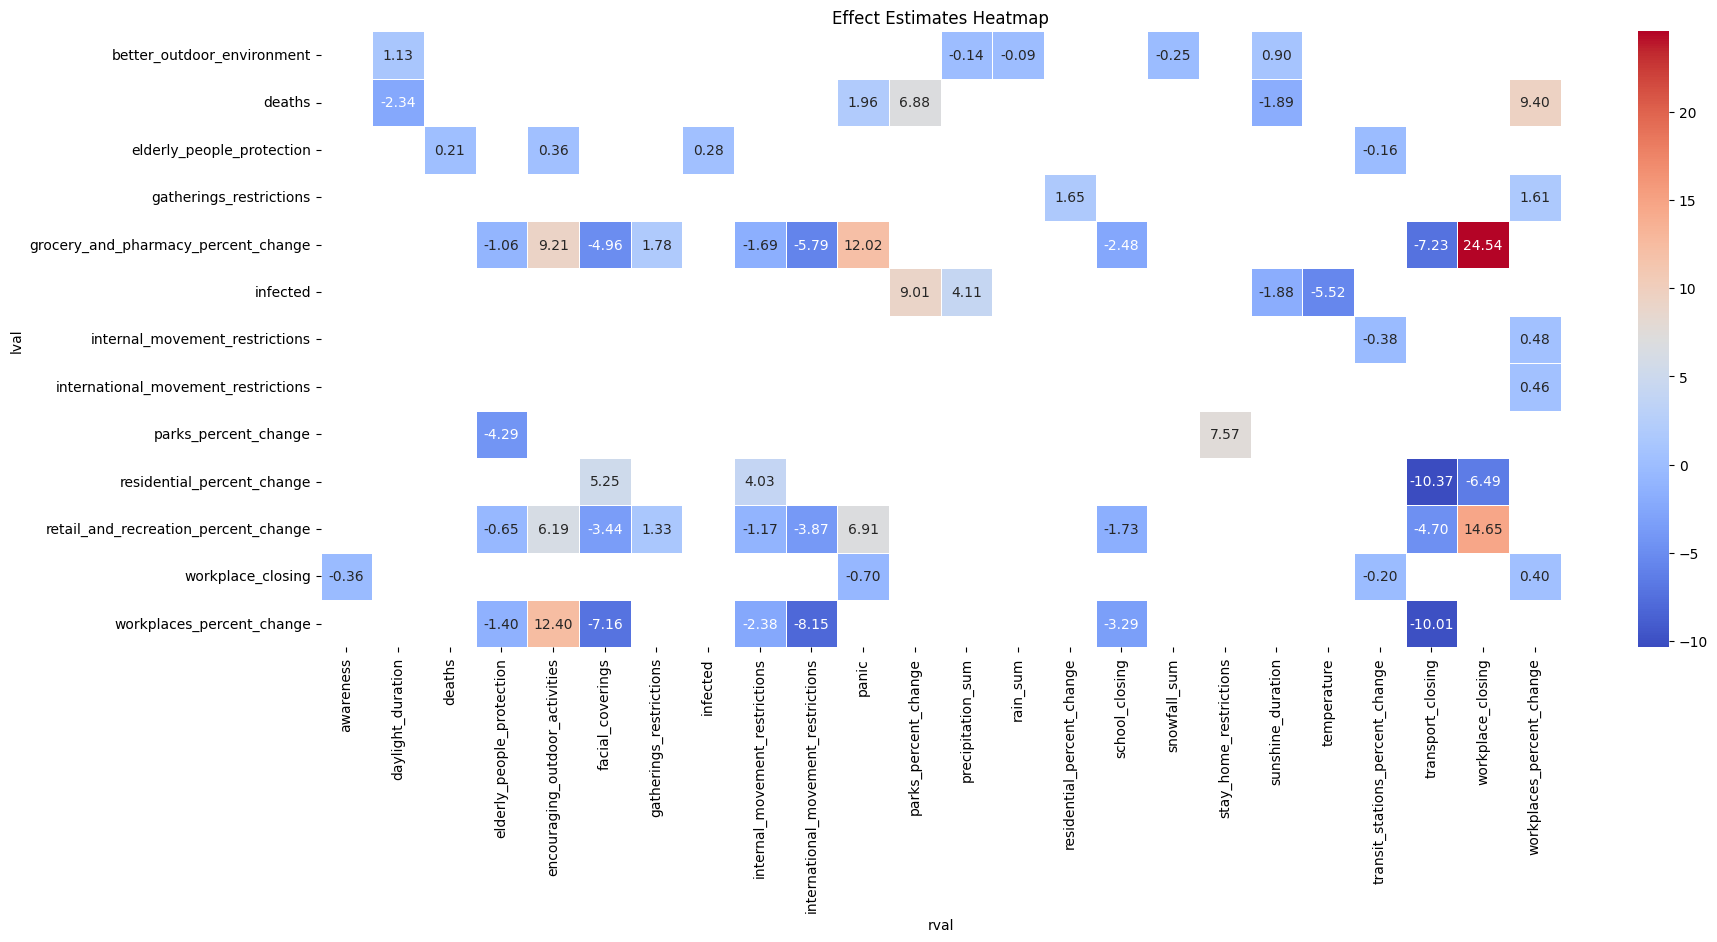

In [16]:
# Pivot the DataFrame to get a matrix format
heatmap_data = corr_matrix.pivot(index="lval", columns="rval", values="Estimate")

# Plot heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Effect Estimates Heatmap")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()
